# Review of material
This homework is about linear and nonlinear regression. From the lecture we remeber that, if

$$
y_i = {\bf w}^T {\bf x}_i  + b + {\epsilon}_i ~~~~ {\text for} ~~ i=1, \cdots, N
$$
where, $b$ is the bias,  and  $\epsilon_i \sim N(0, \sigma^2)$. We also saw that with a change of variavle
$$
{\bf x}  \leftarrow  \begin{bmatrix}
                     1 \\
                     {\bf x} \\
                     \end{bmatrix}
$$
$$
{\bf w}  \leftarrow  \begin{bmatrix}
                     b \\
                     {\bf w}
                     \end{bmatrix}
$$
we can simplify the above equation to
$$
y_i = {\bf w}^T {\bf x}_i  + {\epsilon}_i ~~~~ {\text for} ~~ i=1, \cdots, N
$$
For the training set $D = \{ ( {\bf x}_1, y_1), ( {\bf x}_2, y_2), \cdots,  ( {\bf x}_N, y_N) \}$ we showed that the  likelihood function can be written as
$$
l({\bf w}) = 1/N \sum_{i=1}^N ({\bf w}^T{\bf x}_i - y_i)^2
$$
and the maximum likelihood estimate of ${\bf w}$ given set $D$ can be written as
$$
\hat{\bf w}_{ML} = \underset{\bf w}{argmin} ~ l({\bf w})
$$
therefore to find $\hat{\bf w}_{ML}$, we need to take the derivative of the above equation

$$
\begin{align}
\nabla l({\bf w}) &= \nabla l(\left.w_{1}, w_{2}, \ldots, w_{d+1}\right) \\
\\
&=\left[\begin{array}{c}
\dfrac{\partial l}{\partial w_1}(\left.w_{1}, w_{2}, \ldots, w_{d+1}\right)\\
\dfrac{\partial l}{\partial w_2}(\left.w_{1}, w_{2}, \ldots, w_{d+1}\right) \\
\vdots \\
\dfrac{\partial l}{\partial w_{d+1}}(\left.w_{1}, x_{2}, \ldots, w_{d+1}\right)
\end{array}\right] \\ \\
 & = 1/N \sum_{i=1}^N {\bf x}_i ({\bf x}_i^T {\bf w}- y_i)\\
\end{align}
$$
where $\nabla l({\bf w})$ is the gradient of likelihood function $l({\bf w})$. In future we use the gradient in a gradient descent algorithm to find the minimum of the function. Here we set $\nabla l({\bf w}) = 0$ and solve for ${\bf w}$. As we saw in the class the solution can be written as follows

$$
\hat{\bf w}_{ML} = ({\bf X} {\bf X}^T)^{-1}{\bf X}{\bf y}^T
$$

where
$$
{\bf X} = [{\bf x}_1, {\bf x}_2, \cdots, {\bf x}_N]
$$
and
$$
{\bf y} = [y_1, y_2, \cdots, y_N]
$$


## We generate a data set with linear dependency here

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)
N = 100
b = 3.2
a = 2.5
x = np.random.normal(0, 10, N)
y = a*x + b + np.random.normal(0, 5, N)

**without looking at the data we set aside 20% of the data as test data. The rest is used as training**

Text(0.5, 1.0, 'training data ')

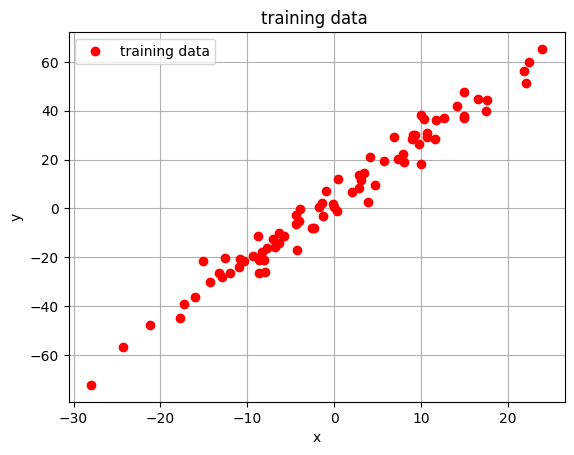

In [2]:
N_tr = int(N*0.8)
N_tst = N-N_tr
x_tr = x[0:N_tr]
y_tr = y[0:N_tr]
x_tst= x[N_tr:]
y_tst = y[N_tr:]
plt.plot(x_tr,y_tr, 'ro', label='training data')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('training data ')

**Change of variable**

$$
{\bf x}  \leftarrow  \begin{bmatrix}
                     1 \\
                     {\bf x}
                     \end{bmatrix}
$$

In [3]:
X = np.vstack((np.ones(N_tr), x_tr))

Now we estimate the ${\bf w}$
$$
\hat{\bf w}_{ML} = ({\bf X} {\bf X}^T)^{-1}{\bf X}{\bf y}^T
$$

In [4]:
w_ml = np.matmul(np.linalg.inv(np.matmul(X, np.transpose(X))) , np.matmul(X,y_tr))

**Let us plot the line we found, training data and test data**

Text(0.5, 1.0, 'training data and maximum likelihood estimate of the curve descring the data')

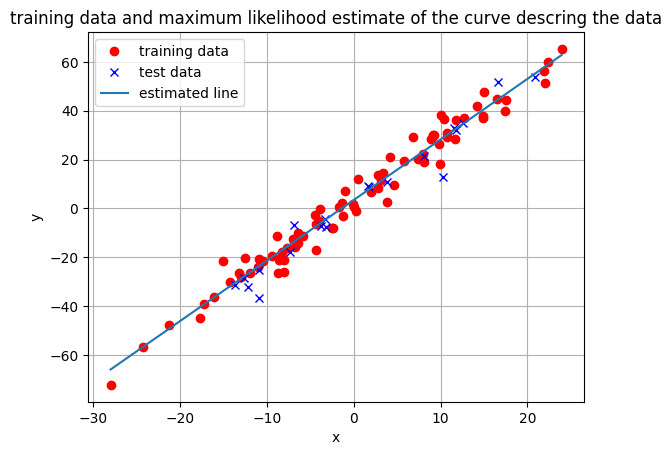

In [5]:
x_min, x_max = np.min(x_tr), np.max(x_tr)
xx = np.linspace(x_min, x_max, 1000)
yy = w_ml[0] + w_ml[1]* xx
plt.plot(x_tr,y_tr, 'ro', label='training data')
plt.plot(x_tst,y_tst, 'bx', label='test data')
plt.plot(xx,yy, label= 'estimated line')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('training data and maximum likelihood estimate of the curve descring the data')

**Now let us calculate the Error of the estimate for the training set and test set**

The error can be written as
$$
{\bf E} = 1/N \sum_{i=1}^N ({\hat{\bf w}}_{ML}^T{\bf x}_i - y_i)^2
$$


In [6]:
X_tr = np.vstack((np.ones(len(x_tr)), x_tr ))
X_tst = np.vstack((np.ones(len(x_tst)), x_tst ))
training_error = np.mean(np.square(np.matmul(w_ml, X_tr) - y_tr))
test_error = np.mean(np.square(np.matmul(w_ml, X_tst) - y_tst))
print('Error_training = ', training_error)
print('Error_Test = ', test_error)


Error_training =  21.990790589492953
Error_Test =  30.27112482314451


# Problem Description
The goal of this problem is to extend the linear regression and find a higher order polynomial fit for the given data. In the following we first describe the problem and then show an analytical solution. Then we generate the training data and the we state the problem.

## Now we want to apply the linear estimation for nonlinear cases
Assume that  the best fit for
the training set $D = \{ ( { x}_1, y_1), ( { x}_2, y_2), \cdots,  ( { x}_N, y_N) \}$ is the polynomial

$$
y_ i = a_0 + a_1 x_i + a_2 x_i^2 + \cdots + a_p x_i^p
$$

we can define
$$
{\bf x}  =           \begin{bmatrix}
                     {1} \\
                     x \\
                     x^2 \\
                     \vdots \\
                     x^p \\
                     \end{bmatrix}
$$
Therefore, for every value of $x_i$ in our training data set we can generate a vector

$$
{\bf x}_i  =           \begin{bmatrix}
                     {1} \\
                     x_i \\
                     x_i^2 \\
                     \vdots \\
                     x_i^p \\
                     \end{bmatrix}
$$

We can still use

$$
{\bf X} = [{\bf x}_1, {\bf x}_2, \cdots, {\bf x}_N]
$$

and

$$
{\bf y} = [y_1, y_2, \cdots, y_N]
$$

Then your solution should be exactly to the one we expressed above, i.e. we get

$$
\hat{\bf w} = ({\bf X} {\bf X}^T)^{-1}{\bf X}{\bf y}^T
$$

**Let us generate the training data**

In [7]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)
N = 100
b = 3.2
a3 = -0.2
a2 = 0.2
a1 = -1

x = np.random.normal(0, 3, N)
y = a3 * np.power(x,3) + a2* np.power(x,2) + a1*x + b + np.random.normal(0, 10, N)

**Here we introduce a more compact way of generating the same data**
You are more than welcome to use any of these two codes for the solution to the HW.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)
N = 100
b = 3.2
a3 = -0.2
a2 = 0.2
a1 = -1
x = np.random.normal(0, 3, N)
p = 3
X = np.ones(N)
for i in np.arange(p):
  X = np.vstack((X, np.power(x , i+1)))
w = np.array([b, a1, a2, a3])
y = np.matmul(w,X) + np.random.normal(0, 10, N)

**We set aside 20% of the data for test**


Text(0.5, 1.0, 'training data ')

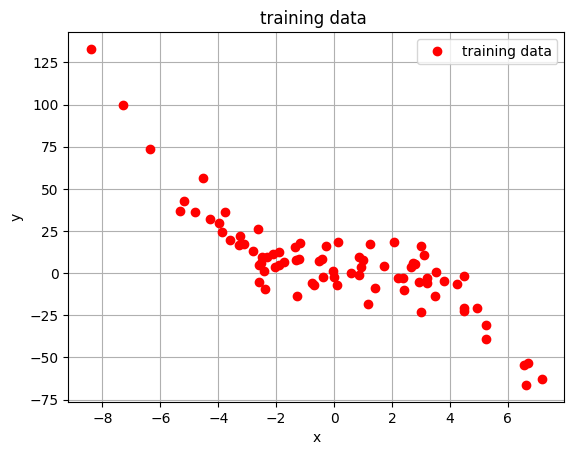

In [9]:
N_tr = int(N*0.8)
N_tst = N-N_tr
x_tr = x[0:N_tr]
y_tr = y[0:N_tr]
x_tst= x[N_tr:]
y_tst = y[N_tr:]
plt.plot(x_tr,y_tr, 'ro', label='training data')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('training data ')

## Problem 1 [4 points]
Use polynomial dregrees $p=2, 3, 4$, and $10$ to find the best fit for the generated data. Follow the procedure shown for the linear case to calculate the error for each case for the training data and for the test data.

Text(0.5, 1.0, 'training data and maximum likelihood estimate of the curve descring the data')

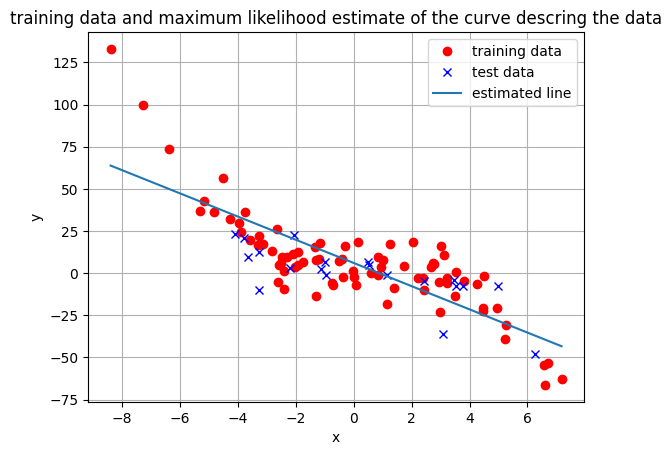

In [10]:
X = np.vstack((np.ones(N_tr), x_tr))
w_ml = np.matmul(np.linalg.inv(np.matmul(X, np.transpose(X))) , np.matmul(X,y_tr))
x_min, x_max = np.min(x_tr), np.max(x_tr)
xx = np.linspace(x_min, x_max, 1000)
yy = w_ml[0] + w_ml[1]* xx
plt.plot(x_tr,y_tr, 'ro', label='training data')
plt.plot(x_tst,y_tst, 'bx', label='test data')
plt.plot(xx,yy, label= 'estimated line')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('training data and maximum likelihood estimate of the curve descring the data')

Error_training for p=2 =  256.2163608034787
Error_Test for p=2 =  231.93440199462097


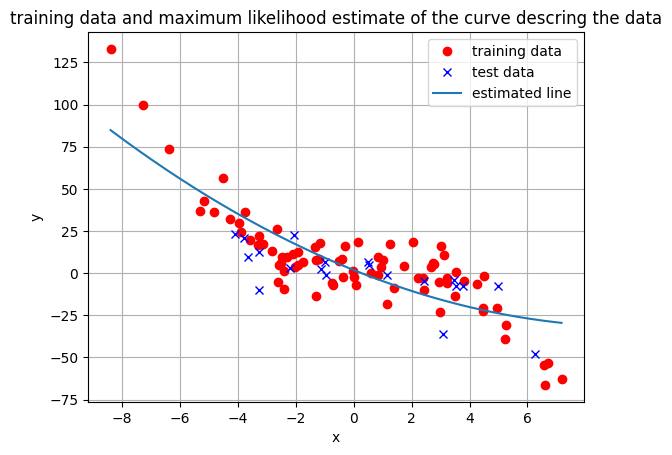

In [11]:
#Plotting for p=2
X = np.vstack((np.ones(N_tr), x_tr, np.square(x_tr)))
w_ml = np.matmul(np.linalg.inv(np.matmul(X, np.transpose(X))) , np.matmul(X,y_tr))
x_min, x_max = np.min(x_tr), np.max(x_tr)
xx = np.linspace(x_min, x_max, 1000)
yy = w_ml[0] + w_ml[1]* xx + w_ml[2]* np.square(xx)
plt.plot(x_tr,y_tr, 'ro', label='training data')
plt.plot(x_tst,y_tst, 'bx', label='test data')
plt.plot(xx,yy, label= 'estimated line')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('training data and maximum likelihood estimate of the curve descring the data')

X_tr = np.vstack((np.ones(len(x_tr)), x_tr, np.square(x_tr) ))
X_tst = np.vstack((np.ones(len(x_tst)), x_tst, np.square(x_tst) ))
training_error = np.mean(np.square(np.matmul(w_ml, X_tr) - y_tr))
test_error = np.mean(np.square(np.matmul(w_ml, X_tst) - y_tst))
print('Error_training for p=2 = ', training_error)
print('Error_Test for p=2 = ', test_error)


Error_training for p=3=  87.58695633561258
Error_Test for p=3 =  122.1837094942197


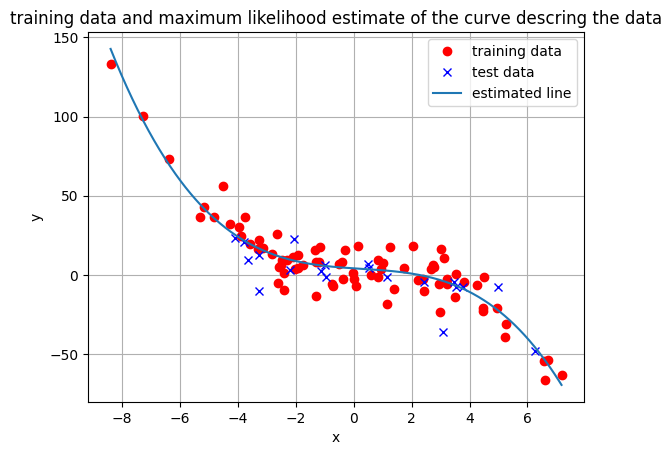

In [12]:
#Plotting for p=3
X = np.vstack((np.ones(N_tr), x_tr, np.square(x_tr), np.power(x_tr,3)))
w_ml = np.matmul(np.linalg.inv(np.matmul(X, np.transpose(X))) , np.matmul(X,y_tr))
x_min, x_max = np.min(x_tr), np.max(x_tr)
xx = np.linspace(x_min, x_max, 1000)
yy = w_ml[0] + w_ml[1]* xx + w_ml[2]* np.square(xx) + w_ml[3]* np.power(xx,3)
plt.plot(x_tr,y_tr, 'ro', label='training data')
plt.plot(x_tst,y_tst, 'bx', label='test data')
plt.plot(xx,yy, label= 'estimated line')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('training data and maximum likelihood estimate of the curve descring the data')

X_tr = np.vstack((np.ones(len(x_tr)), x_tr, np.square(x_tr), np.power(x_tr,3) ))
X_tst = np.vstack((np.ones(len(x_tst)), x_tst, np.square(x_tst),np.power(x_tst,3) ))
training_error = np.mean(np.square(np.matmul(w_ml, X_tr) - y_tr))
test_error = np.mean(np.square(np.matmul(w_ml, X_tst) - y_tst))
print('Error_training for p=3= ', training_error)
print('Error_Test for p=3 = ', test_error)


Error_training for p=4 =  84.80020948702764
Error_Test for p=4 =  128.56855395240157


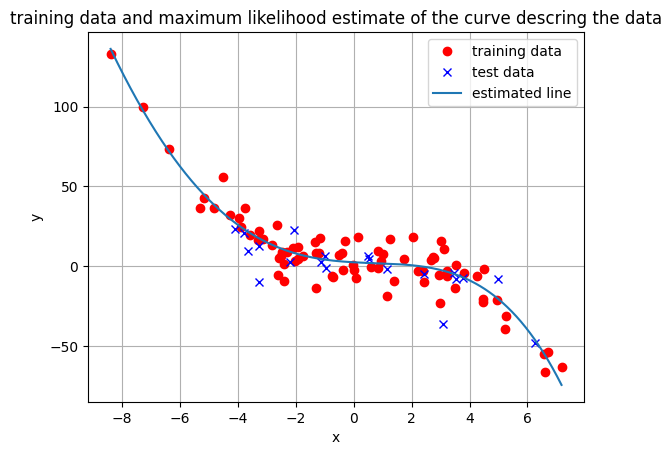

In [13]:
#Plotting for p=4
X = np.vstack((np.ones(N_tr), x_tr, np.square(x_tr), np.power(x_tr,3), np.power(x_tr,4)))
w_ml = np.matmul(np.linalg.inv(np.matmul(X, np.transpose(X))) , np.matmul(X,y_tr))
x_min, x_max = np.min(x_tr), np.max(x_tr)
xx = np.linspace(x_min, x_max, 1000)
yy = w_ml[0] + w_ml[1]* xx + w_ml[2]* np.square(xx) + w_ml[3]* np.power(xx,3)+ w_ml[4]*np.power(xx,4)
plt.plot(x_tr,y_tr, 'ro', label='training data')
plt.plot(x_tst,y_tst, 'bx', label='test data')
plt.plot(xx,yy, label= 'estimated line')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('training data and maximum likelihood estimate of the curve descring the data')

X_tr = np.vstack((np.ones(len(x_tr)), x_tr, np.square(x_tr), np.power(x_tr,3), np.power(x_tr,4) ))
X_tst = np.vstack((np.ones(len(x_tst)), x_tst, np.square(x_tst),np.power(x_tst,3), np.power(x_tst,4) ))
training_error = np.mean(np.square(np.matmul(w_ml, X_tr) - y_tr))
test_error = np.mean(np.square(np.matmul(w_ml, X_tst) - y_tst))
print('Error_training for p=4 = ', training_error)
print('Error_Test for p=4 = ', test_error)


Error_training for p=10 =  76.87650158373722
Error_Test for p=10 =  157.83042117504164


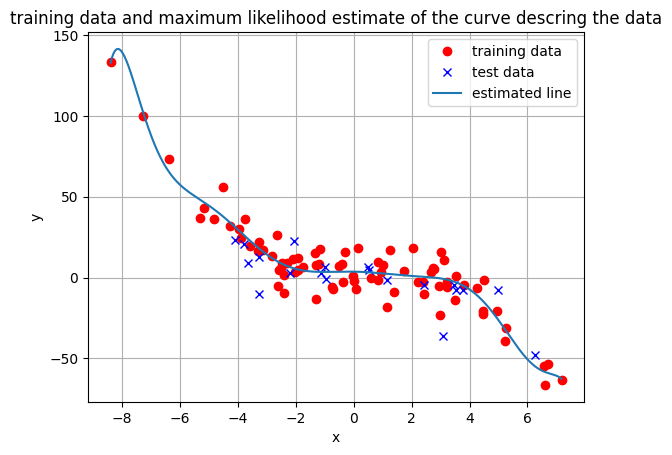

In [14]:
#Plotting for p=10
a=[]
for i in range (2,11):
  a.append(np.power(x_tr,i))
b=[]
for i in range (2,11):
  b.append(np.power(x_tst,i))
X = np.vstack((np.ones(N_tr), x_tr, a))
w_ml = np.matmul(np.linalg.inv(np.matmul(X, np.transpose(X))) , np.matmul(X,y_tr))
x_min, x_max = np.min(x_tr), np.max(x_tr)
xx = np.linspace(x_min, x_max, 1000)
yy= w_ml[0]
for i in range (1,11):
  yy+= w_ml[i]*np.power(xx,i)
plt.plot(x_tr,y_tr, 'ro', label='training data')
plt.plot(x_tst,y_tst, 'bx', label='test data')
plt.plot(xx,yy, label= 'estimated line')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('training data and maximum likelihood estimate of the curve descring the data')

X_tr = np.vstack((np.ones(len(x_tr)), x_tr, a))
X_tst = np.vstack((np.ones(len(x_tst)), x_tst, b))
training_error = np.mean(np.square(np.matmul(w_ml, X_tr) - y_tr))
test_error = np.mean(np.square(np.matmul(w_ml, X_tst) - y_tst))
print('Error_training for p=10 = ', training_error)
print('Error_Test for p=10 = ', test_error)

## Problem 2 [1 point]
Please, compare the four results and explain which $p$ degree would be best to use. Justify your answer.

These are the errors for training and testing data for p=2,3,4,10

Error_training for p=2 =  256.2163608034787  and  Error_Test for p=2 =  231.93440199462097


Error_training for p=3=  87.58695633561258  and  Error_Test for p=3 =  122.1837094942197


Difference for p=3: 34.596753158607115

Error_training for p=4 =  84.80020948702764  and Error_Test for p=4 =  128.56855395240157


Difference for p=4: 43.76834446537393


Error_training for p=10 =  76.87650158373722 and  Error_Test for p=10 =  157.83042117504164



The polynomial regression for degree p=2 is underfitting the data.


The polynomial regression for degree p=10 is overfitting the data.


Now if we consider the polynomial regression for degree p=3 and p=4, they look similar, but we see the difference in the training and test error, degree p=3 has less error.


So, I would say that the polynomial regression with degree p=3 is the best fit for this data.
